In [31]:
import pandas as pd
df = pd.read_csv('../data/raw/MTA_Subway_Trains_Delayed__Beginning_2020.csv')
df

,month,subdivison,line,day_type,reporting_category,subcategory,delays
0,2023-08,A DIVISION,1,1,Crew Availability,Crew Availability,193
1,2023-08,A DIVISION,1,1,External Factors,External Agency or Utility,111
2,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Braking,15
3,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,10
4,2023-08,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",16
...,...,...,...,...,...,...,...
29732,2020-01,Systemwide,Systemwide,2,External Factors,Systemwide,348
29733,2020-01,Systemwide,Systemwide,2,Infrastructure & Equipment,Systemwide,1480
29734,2020-01,Systemwide,Systemwide,2,Operating Conditions,Systemwide,1557
29735,2020-01,Systemwide,Systemwide,2,Planned ROW Work,Systemwide,1938


In [32]:
missingVals = df.isnull().sum()
print(missingVals)

month                    0
subdivison               0
line                     0
day_type                 0
reporting_category       0
subcategory           1762
delays                   0
dtype: int64


here we see that in the subcategory for reasons for delay there are 1762 empty values. So i will use fillna to replace these with a string

In [33]:
df['subcategory'].fillna("not specified",inplace=True)

^FILLING IN MISSING VALUES

In [34]:
df['month'] = pd.to_datetime(df['month'])
df

,month,subdivison,line,day_type,reporting_category,subcategory,delays
0,2023-08-01,A DIVISION,1,1,Crew Availability,Crew Availability,193
1,2023-08-01,A DIVISION,1,1,External Factors,External Agency or Utility,111
2,2023-08-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,15
3,2023-08-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,10
4,2023-08-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",16
...,...,...,...,...,...,...,...
29732,2020-01-01,Systemwide,Systemwide,2,External Factors,Systemwide,348
29733,2020-01-01,Systemwide,Systemwide,2,Infrastructure & Equipment,Systemwide,1480
29734,2020-01-01,Systemwide,Systemwide,2,Operating Conditions,Systemwide,1557
29735,2020-01-01,Systemwide,Systemwide,2,Planned ROW Work,Systemwide,1938


converted month column to datetime type 
(TYPE CONVERSION)


In [35]:
lineDelays = df['line'].describe()
print(lineDelays)

count     29737
unique       24
top           N
freq       1671
Name: line, dtype: object


Using .describe() I found that the most delayed line is the N train 
(SUMMARY STATISTICS)

In [36]:
broadCategory = df['reporting_category'].describe()
subCat = df['subcategory'].describe()
print(broadCategory)
print(subCat)
#used .describe to get the summary stats for these columns

count                          29737
unique                             6
top       Infrastructure & Equipment
freq                           14219
Name: reporting_category, dtype: object
count                                      29737
unique                                        26
top       Public Conduct, Crime, Police Response
freq                                        1859
Name: subcategory, dtype: object


The most common reason for delays on the NYC subway is infrastructure and equipment. Interestingly, the most common subreason is public conduct. 
(SUMMARY STATISTICS)

VISUALIZATIONS

In [37]:
lineCount = df['line'].value_counts()
print(lineCount)

N             1671
A             1663
2             1632
Q             1572
D             1570
F             1532
4             1521
R             1519
6             1444
1             1435
3             1432
E             1419
C             1401
5             1378
7             1280
JZ            1255
G             1223
M             1141
L             1132
B              800
S Rock         677
Systemwide     528
S Fkln         267
S 42nd         245
Name: line, dtype: int64


the delays per line using .value_count()

<AxesSubplot:xlabel='Subway line', ylabel='Delays'>

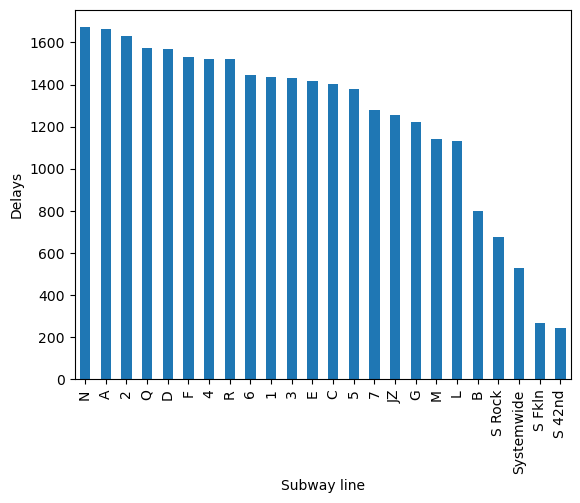

In [38]:
lineCount.plot(kind = 'bar',xlabel = "Subway line",ylabel = 'Delays')

using.plot to plot the data in a bar graph

In [39]:
subcatCount = df['subcategory'].value_counts()
subcatCount

Public Conduct, Crime, Police Response    1859
Crew Availability                         1797
Other - Sig                               1767
not specified                             1762
Subways Maintenance                       1758
Sick/Injured Customer                     1628
Service Delivery                          1610
Persons on Roadbed                        1495
Other - CE                                1434
Rail and Roadbed                          1433
Door-Related                              1372
Work Equipment                            1272
Braking                                   1204
Fire, Smoke, Debris                       1149
Other Infrastructure                      1139
Capital Work - Other Planned ROW          1035
Propulsion                                1018
Train Brake Activation - Cause Unknown     960
External Debris on Roadbed                 866
Other Internal Disruptions                 847
Inclement Weather                          703
Systemwide   

<AxesSubplot:xlabel='subcategory', ylabel='frequency'>

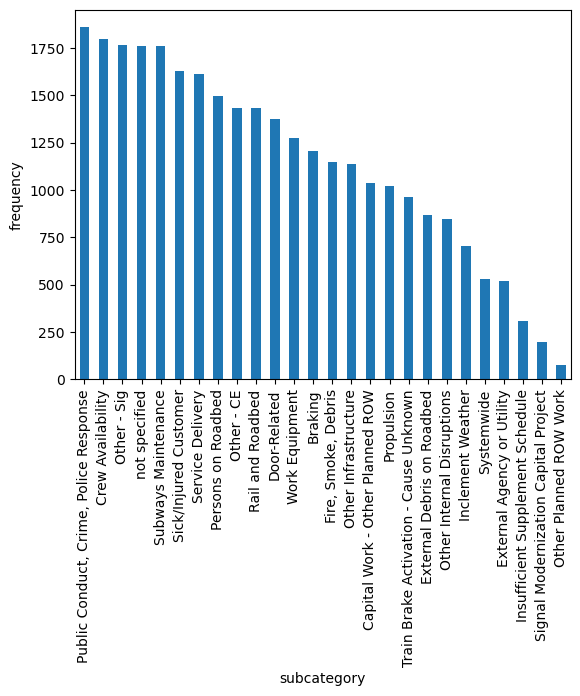

In [40]:
subcatCount.plot(kind = 'bar',xlabel = 'subcategory',ylabel= 'frequency')

In [41]:
reasonCount = df['reporting_category'].value_counts()
reasonCount

Infrastructure & Equipment    14219
Police & Medical               5070
Planned ROW Work               4537
External Factors               2176
Crew Availability              1885
Operating Conditions           1850
Name: reporting_category, dtype: int64

<AxesSubplot:title={'center':'Major Reasons for delays on NYC Subway'}>

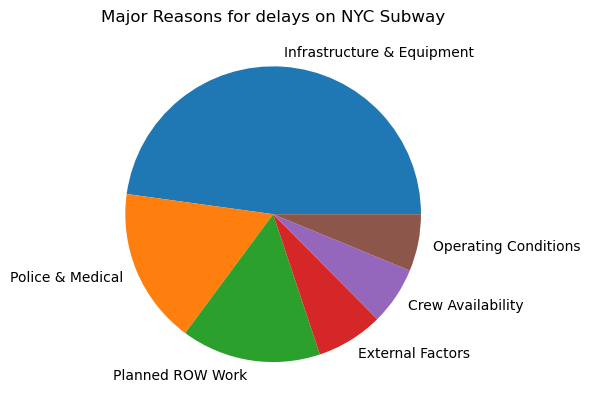

In [42]:
reasonCount.plot(kind='pie',ylabel='',title='Major Reasons for delays on NYC Subway')

used .plot and kind='pie' to make a pie chart of the major reasons for delays on the nyc subway and visualize the data easier. Clearly infrastructure is the biggest reason for delays. 